In [1]:
import sys
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport log_plotter
from log_plotter import get_accuracies
import matplotlib.ticker as mtick

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np

In [5]:
def format_accuracies(unf_accuracies, tag='Tacc'):
    reformed_accuracies = {}
    for accuracy in unf_accuracies:
        for method in accuracy[tag][0]:
            # sample data ((0.0, 76.3499984741211), 'NUQ')
            acc = method[0][1]
            err = method[0][0]
            method_name = method[1]

            if method_name not in list(reformed_accuracies):
                reformed_accuracies[method_name] = [acc]
            else:
                reformed_accuracies[method_name].append(acc)
    return reformed_accuracies

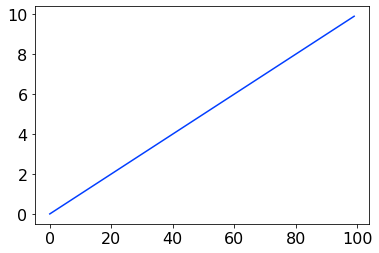

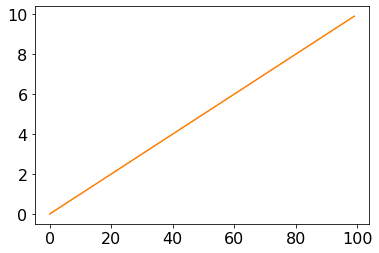

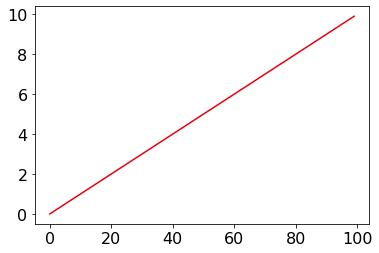

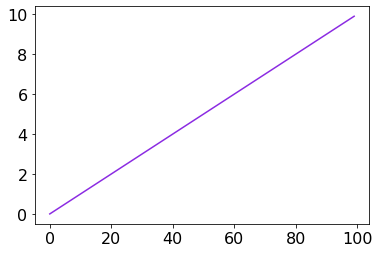

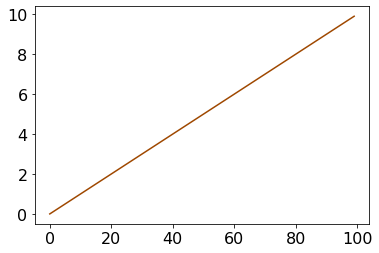

In [6]:
x = np.arange(0, 10, 0.1)
colors = [
        (0.00784313725490196, 0.24313725490196078, 1.0),
        (1.0, 0.48627450980392156, 0.0),
        (0.9098039215686274, 0.0, 0.043137254901960784),
        (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
        (0.6235294117647059, 0.2823529411764706, 0.0)]
for color in colors:
    plt.plot(x, color=color)
    plt.show()


In [104]:
def plot_accuracies(accuracies, xaxis, filename, xtitle, ytitle, xscale=True):
    colors = [
        (0.00784313725490196, 0.24313725490196078, 1.0),
        (1.0, 0.48627450980392156, 0.0),
        (0.9098039215686274, 0.0, 0.043137254901960784),
        (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
        (0.6235294117647059, 0.2823529411764706, 0.0)]
    colors2 = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451)]
    colors3 = [(0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9856978085351787, 0.8889657823913879, 0.8320645905420992),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.530026912725875, 0.7456362937331797, 0.8560553633217994),
 (0.1843137254901961, 0.47266435986159167, 0.7116493656286044)]
    dark =[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744)]
    color = [[0.00784314, 0.24313725, 1.],
             [1., 0.48627451, 0.],
             [0.10196078, 0.78823529, 0.21960784],
             [0.90980392, 0., 0.04313725],
             [0.54509804, 0.16862745, 0.88627451]]
    #style = ['-', '--', ':', '-.']
    styles = ['-']
    orders = [ 'ALQ', 'AMQ', 'ALQ-N', 'AMQ-N','Qinf', 'TRN', 'NUQ,p=0.5', 'SignSGD', 'SignSGDInf']
    import collections
#     markers = 
    colors = color
#     styles = ['-', '--', ':', '-.']
    markers = ['o', 'X', 'p', '*', 'd', 'v']
    index = 0
    accuracies = collections.OrderedDict(sorted(accuracies.items()))
    print(accuracies)
    for method, vals in accuracies.items():
        style = styles[0]
        index_2 = orders.index(method)
        color = colors[(index_2) % len(colors)]
        marker = markers[(index_2) % len(markers)]
        vals = np.array(vals)
        indexes = vals != 0
        plt.plot(np.array(xaxis)[indexes], vals[indexes], label=method, color=color, linestyle=style, marker=marker, markersize=10+index_2, markevery=2+index_2%3)
        index += 1
    ax = plt.gca()
    if xscale:
        ax.set_xscale('log')
        ax.xaxis.set_major_formatter(mtick.ScalarFormatter())
        ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    ax.set_xlabel(xtitle)
    plt.grid(linewidth=1)
    ax.set_ylabel(ytitle + ' (%)')
    handles, labels = plt.gca().get_legend_handles_labels()

#     plt.title(ytitle + ' vs ' + xtitle)
    norders = []
    for order in orders:
        if order in labels:
            norders.append(order)

    order = []
    
    for label in labels:
        order.append(norders.index(label))
    
    nlabels = np.arange(len(labels)).tolist()
    nhandles = np.arange(len(handles)).tolist()
    for idx, label, handle in zip(order, labels, handles):
        nlabels[idx] = label
        nhandles[idx] = handle
    print(nlabels)
    dirn = 'figs_acc/'
    plt.savefig(dirn + filename, dpi=100, bbox_inches='tight')
    plt.legend(nhandles, nlabels, bbox_to_anchor=(1.01, 1.0))
    plt.savefig(dirn+'lo-'+filename, dpi=100, bbox_inches='tight')
    plt.legend(nhandles, nlabels)
    plt.savefig(dirn+'li-'+filename, dpi=100, bbox_inches='tight')

In [80]:
def trim_name(name, accuracies, pad=None):
    new_accuracies = [0]*pad
    for method, vals in accuracies.items():
        new_accuracies += vals
    return {
        name: new_accuracies
    }

In [130]:
lg_tags = ['estim_sgd', 'nuq_method', 'nuq_mul']
logdir = '/h/iman/Code/nuqsgd/runs'
tag = 'Vacc'
ytitle = 'Validation Accuracy'
lg_replace = [('p2_', 'P='), ('estim_sgd', 'SGD'), ('nuq_mul_', 'p='), ('ngpu_', 'GPU='), ('nuq_method', ''), ('_q', 'Q'), ('nuq_inv_', 'Inv'), ('nuq_sym_', 'Sym'), ('_amq_nb', 'AMQ'), ('_amq', 'AMQ-N'), ('_alq_nb', 'ALQ'), ('_trn', 'TRN'), ('_alq', 'ALQ-N'), ('_qinf', 'Qinf'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$'), ('_l2q', 'L2Q'), ('_none', 'SuperSGD'), ('nuq_layer_1', 'w/o layers'), ('nuq_layer_0', 'w/ layers'),('_nuq', 'NUQ')]
bucket_sizes = ['32', '64', '128', '256', '512', '1024', '2048', '4096', '8192', '16384', '32768']
accuracies_bs = []
for bucket_size in bucket_sizes:
    patterns = ['.*runs_cifar10_full/bs_.*nuq_bucket_size_' + bucket_size + '.*,(?!(.*nuq_sym.*|.*nuq_inv))']
    accuracies_bs.append(get_accuracies(patterns, lg_replace, lg_tags, logdir, tag))

accuracies_sgi = []
lg_tags = ['sa2']
lg_replace = [('sa2_', 'SignSGDInf')]
bucket_sizes = ['2048', '4096', '8192', '16384', '32768']

for bucket_size in bucket_sizes:
    patterns = ['.*runs_cifar10_full/sa2_.*nuq_bucket_size_' + bucket_size + '.*,(?!(.*nuq_sym.*|.*nuq_inv))']
    accuracies_sgi.append(get_accuracies(patterns, lg_replace, lg_tags, logdir, tag))

accuracies_sg = []

lg_tags = ['sa3']
lg_replace = [('sa3_', 'SignSGD')]
for bucket_size in bucket_sizes:
    patterns = ['.*runs_cifar10_full/sa3_.*nuq_bucket_size_' + bucket_size + '.*,(?!(.*nuq_sym.*|.*nuq_inv))']
    accuracies_sg.append(get_accuracies(patterns, lg_replace, lg_tags, logdir, tag))


In [113]:
accuracies_bs

[{'Vacc': [[((0.06118858728755413, 86.56599884033203), 'AMQ'),
    ((0.07138485048278534, 86.54200134277343), 'AMQ-N'),
    ((0.09899513434545146, 88.06999969482422), 'ALQ'),
    ((0.12607974482436077, 73.32799987792968), 'NUQ,p=0.5'),
    ((0.07059692648369724, 88.19400024414062), 'ALQ-N'),
    ((0.12142331767731569, 83.84400024414063), 'Qinf'),
    ((0.06343537560644226, 84.8760009765625), 'TRN')]],
  'Tacc': [[((0.06014057600040922, 91.29719848632813), 'AMQ'),
    ((0.05995460777391494, 91.36920013427735), 'AMQ-N'),
    ((0.07512437016038431, 95.02960052490235), 'ALQ'),
    ((0.07191725601811555, 74.64519958496093), 'NUQ,p=0.5'),
    ((0.06468632922316665, 94.9875991821289), 'ALQ-N'),
    ((0.06369989877651171, 86.36999969482422), 'Qinf'),
    ((0.11212507255989353, 88.7947982788086), 'TRN')]]},
 {'Vacc': [[((0.0884078724428425, 88.1779998779297), 'ALQ'),
    ((0.07889119753575055, 87.31399841308594), 'TRN'),
    ((0.03611121737326853, 88.1240020751953), 'ALQ-N'),
    ((0.0784853253

In [117]:
reformed_accuracies_sgi = format_accuracies(accuracies_sgi, tag)
reformed_accuracies_sg = format_accuracies(accuracies_sg, tag)

In [118]:
trimmed_accuracies_sgi = trim_name('SignSGDInf', reformed_accuracies_sgi, pad=6)
trimmed_accuracies_sg = trim_name('SignSGD', reformed_accuracies_sg, pad=6)

In [119]:
reformed_accuracies_bs = format_accuracies(accuracies_bs, tag)

In [120]:
reformed_accuracies_bs['SignSGD'] = trimmed_accuracies_sg['SignSGD']
reformed_accuracies_bs['SignSGDInf'] = trimmed_accuracies_sgi['SignSGDInf']

OrderedDict([('ALQ', [88.06999969482422, 88.1779998779297, 88.62200012207032, 88.14400024414063, 88.48800048828124, 88.51799926757812, 88.31999969482422, 88.07799987792968, 88.47000122070312, 88.61600189208984, 88.06999969482422]), ('ALQ-N', [88.19400024414062, 88.1240020751953, 88.41200103759766, 88.44599914550781, 88.1020004272461, 88.53200073242188, 88.39000091552734, 88.40800170898437, 88.39399871826171, 87.98200073242188, 88.19400024414062]), ('AMQ', [86.56599884033203, 88.27799987792969, 88.36999969482422, 88.32799987792968, 88.68399963378906, 88.75400085449219, 87.97200012207031, 87.44599914550781, 87.90599975585937, 87.80599822998047, 86.56599884033203]), ('AMQ-N', [86.54200134277343, 88.12799987792968, 87.96200103759766, 88.7040008544922, 88.01800079345703, 88.38200073242187, 87.91399993896485, 87.6, 87.99600067138672, 87.71999969482422, 86.54200134277343]), ('NUQ,p=0.5', [73.32799987792968, 88.07999877929687, 88.11600036621094, 86.86999969482422, 85.6259994506836, 84.46200103

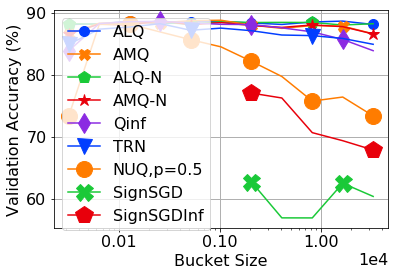

In [121]:
bucket_sizes = ['32', '64', '128', '256', '512', '1024', '2048', '4096', '8192', '16384', '32768']
bucket_sizes = list(map(int, bucket_sizes))
plot_accuracies(reformed_accuracies_bs, bucket_sizes, 'bucket-size-t.pdf', xtitle='Bucket Size', ytitle=ytitle)

In [131]:
accuracies_bits = []

bits = ['2']
for bit in bits:
    patterns = ['.*runs_cifar10_full/bi3_.*nuq_bits_' + bit + ',.*,(?!(.*nuq_sym.*|.*nuq_inv))']
    accuracies_bits.append(get_accuracies(patterns, lg_replace, lg_tags, logdir))
bits = [ '3', '4', '5']
for bit in bits:
    patterns = ['.*runs_cifar10_full/bi2_.*nuq_bits_' + bit + ',.*,(?!(.*nuq_sym.*|.*nuq_inv))']
    accuracies_bits.append(get_accuracies(patterns, lg_replace, lg_tags, logdir))
bits = ['6']
for bit in bits:
    patterns = ['.*runs_cifar10_full/bi4_.*nuq_bits_' + bit + ',.*,(?!(.*nuq_sym.*|.*nuq_inv))']
    accuracies_bits.append(get_accuracies(patterns, lg_replace, lg_tags, logdir))
bits = [ '7']
for bit in bits:
    patterns = ['.*runs_cifar10_full/bi2_.*nuq_bits_' + bit + ',.*,(?!(.*nuq_sym.*|.*nuq_inv))']
    accuracies_bits.append(get_accuracies(patterns, lg_replace, lg_tags, logdir))

In [132]:
accuracies_bits

[{'Vacc': [[((0.10632088169144839, 85.79600219726562), ''),
    ((0.08138866023678999, 66.96600036621093), ''),
    ((0.08034862697354686, 84.48200073242188), ''),
    ((0.13600120545236083, 76.11800079345703), ''),
    ((0.10722044638959762, 77.9479995727539), ''),
    ((0.053065083441254685, 85.47799835205078), ''),
    ((0.05692055828613218, 80.52999877929688), '')]],
  'Tacc': [[((0.07596954669406164, 90.3759994506836), ''),
    ((0.15653832350482355, 67.07360076904297), ''),
    ((0.10287506105733597, 88.3051986694336), ''),
    ((0.08030335029686868, 77.07639770507812), ''),
    ((0.13313531011085197, 79.61399841308594), ''),
    ((0.090798501297686, 89.59879913330079), ''),
    ((0.17358733407341706, 82.3740005493164), '')]]},
 {'Vacc': [[((0.03498411336119893, 87.22599945068359), ''),
    ((0.041181091884333956, 87.37799987792968), ''),
    ((0.06112470047422461, 87.98799896240234), ''),
    ((0.04223647624745057, 85.25399932861328), ''),
    ((0.06462100111635297, 87.941999816

In [124]:
bits = ['2', '3', '4', '5', '6', '7']

In [125]:
reformed_accuracies_bits = format_accuracies(accuracies_bits, tag)
bits = list(map(int, bits))
plot_accuracies(reformed_accuracies_bits, bits, 'bits-t.pdf', '# bits', xscale=False, ytitle=ytitle)

OrderedDict([('', [85.79600219726562, 66.96600036621093, 84.48200073242188, 76.11800079345703, 77.9479995727539, 85.47799835205078, 80.52999877929688, 87.22599945068359, 87.37799987792968, 87.98799896240234, 85.25399932861328, 87.94199981689454, 85.68600006103516, 77.18200073242187, 87.2959991455078, 87.47800140380859, 87.8540023803711, 88.05599975585938, 85.35399780273437, 88.24400177001954, 87.51199951171876, 88.46000061035156, 88.2, 88.36199951171875, 85.39800109863282, 88.54199829101563, 88.26799926757812, 88.37200012207032, 88.18000030517578, 88.53799896240234, 88.1719985961914, 88.1020004272461, 85.99600067138672, 88.23400115966797, 88.14599914550782, 88.24799957275391, 85.18800048828125, 88.05599975585938, 87.96199951171874, 88.10399932861328, 87.84400177001953, 88.0000015258789])])


ValueError: '' is not in list